The goal of this notebook is to look at my expenses and income, especially post-Biobot.

It's a copy of the previous notebook, adapted for the new data.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates

%matplotlib inline

In [2]:
df = pd.read_csv('XXXXXXXXX849_Checking_Transactions_20230826-202147.csv')
df.head()

Transactions  for Checking account ...849 as of 08/26/2023 04:21:47 PM ET
Date                                               Type Check # Description                              Withdrawal (-) Deposit (+)                                     RunningBalance                       
Pending Transactions are not reflected within t... NaN  NaN     NaN                                      NaN            NaN                                                        NaN                       
Posted Transactions                                NaN  NaN     NaN                                      NaN            NaN                                                        NaN                       
08/25/2023                                         ACH  NaN     GRASSHOPPER BANK NEWACCDEP  882 -LLP9P0S $100.00        NaN                                                 $34,767.90                       
                                                                1ST BANKCARD CTR CR CRD PMT 230825~ Tran $62.72         NaN                                                 $34,867.90

Ah, annoying there's four rows of non-header info, and the headers are in the second row.

In [4]:
df = pd.read_csv('XXXXXXXXX849_Checking_Transactions_20230826-202147.csv', skiprows=1)
df = df.iloc[2:]
df.head()

,Date,Type,Check #,Description,Withdrawal (-),Deposit (+),RunningBalance
2,08/25/2023,ACH,NaN,GRASSHOPPER BANK NEWACCDEP 882 -LLP9P0S,$100.00,NaN,"$34,767.90"
3,08/25/2023,ACH,NaN,1ST BANKCARD CTR CR CRD PMT 230825~ Tran,$62.72,NaN,"$34,867.90"
4,08/25/2023,ACH,NaN,0150KS95 NEW ENG PAYROLL 082523~ Tran: A,NaN,"$1,120.68","$34,930.62"
5,08/23/2023,DEPOSIT,NaN,Deposit Mobile Banking,NaN,$250.00,"$33,809.94"
6,08/18/2023,ACH,NaN,RAMP REIMBURSE C DUVALLET CLAIRE DUVALL,NaN,$99.86,"$33,559.94"


In [5]:
df = df.rename(columns={'Withdrawal (-)': 'withdrawal', 'Deposit (+)': 'deposit', 'Check #': 'check_num'})
df.columns = [i.lower() for i in df.columns]

In [6]:
df.head()

,date,type,check_num,description,withdrawal,deposit,runningbalance
2,08/25/2023,ACH,NaN,GRASSHOPPER BANK NEWACCDEP 882 -LLP9P0S,$100.00,NaN,"$34,767.90"
3,08/25/2023,ACH,NaN,1ST BANKCARD CTR CR CRD PMT 230825~ Tran,$62.72,NaN,"$34,867.90"
4,08/25/2023,ACH,NaN,0150KS95 NEW ENG PAYROLL 082523~ Tran: A,NaN,"$1,120.68","$34,930.62"
5,08/23/2023,DEPOSIT,NaN,Deposit Mobile Banking,NaN,$250.00,"$33,809.94"
6,08/18/2023,ACH,NaN,RAMP REIMBURSE C DUVALLET CLAIRE DUVALL,NaN,$99.86,"$33,559.94"


In [7]:
# Fix the dtypes
df['withdrawal'] = df['withdrawal'].str.strip('$').str.replace(',', '').astype(float)
df['deposit'] = df['deposit'].str.strip('$').str.replace(',', '').astype(float)
df['runningbalance'] = df['runningbalance'].str.strip('$').str.replace(',', '').astype(float)
df.head()

,date,type,check_num,description,withdrawal,deposit,runningbalance
2,08/25/2023,ACH,NaN,GRASSHOPPER BANK NEWACCDEP 882 -LLP9P0S,100.00,NaN,34767.90
3,08/25/2023,ACH,NaN,1ST BANKCARD CTR CR CRD PMT 230825~ Tran,62.72,NaN,34867.90
4,08/25/2023,ACH,NaN,0150KS95 NEW ENG PAYROLL 082523~ Tran: A,NaN,1120.68,34930.62
5,08/23/2023,DEPOSIT,NaN,Deposit Mobile Banking,NaN,250.00,33809.94
6,08/18/2023,ACH,NaN,RAMP REIMBURSE C DUVALLET CLAIRE DUVALL,NaN,99.86,33559.94


In [8]:
# And convert date string to datetime
df['date'] = pd.to_datetime(df['date'])

Next let's add some mappings to help the groupby. We'll want year and month indicators.

In [9]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

And now we can sum!

In [12]:
monthly = df.groupby(['year', 'month'])[['withdrawal', 'deposit']].sum().reset_index()
monthly.tail()

,year,month,withdrawal,deposit
20,2023,4,13618.03,3459.37
21,2023,5,6340.62,7501.93
22,2023,6,4661.78,5726.91
23,2023,7,16263.62,5672.70
24,2023,8,15606.01,7125.40


In [14]:
# Make a date column for easier plotting (fingers crossed)
monthly['date'] = pd.to_datetime(monthly['year'].astype(str) + '-' + monthly['month'].astype(str))
monthly = monthly.set_index('date')

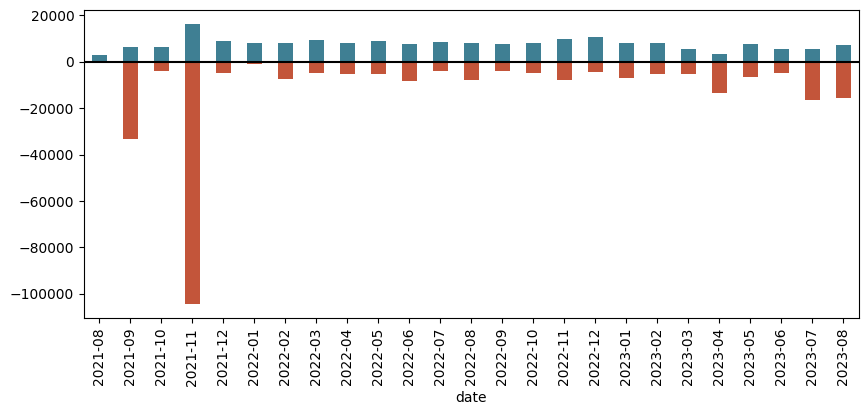

In [15]:
fig, ax = plt.subplots(figsize=(10, 4))

blue = sns.diverging_palette(220, 20)[0]
red = sns.diverging_palette(220, 20)[-1]

# Plot deposits positive
ax = monthly['deposit'].plot(kind='bar', ax=ax, color=blue)

# Plot withdrawals negative
ax = (-1*monthly['withdrawal']).plot(kind='bar', ax=ax, color=red)

# Add horizontal line
ax.axhline(0, c='k')

# 
_ = ax.set_xticklabels(monthly.index.strftime('%Y-%m'))

In [17]:
# What happened in April?
df.query('date >= "2023-03-01"').query('date < "2023-05-01"')

,date,type,check_num,description,withdrawal,deposit,runningbalance,month,year
57,2023-04-28,INTADJUST,NaN,Interest Paid,NaN,18.87,51612.99,4,2023
58,2023-04-28,ATMREBATE,NaN,ATM Fee Rebate,NaN,3.50,51594.12,4,2023
59,2023-04-28,CHECK,106.0,Check Paid #106,247.00,NaN,51590.62,4,2023
60,2023-04-27,ACH,NaN,CITI AUTOPAY PAYMENT 230426,388.66,NaN,51837.62,4,2023
61,2023-04-25,ACH,NaN,1ST BANKCARD CTR CR CRD PMT 230425~ Tran,62.72,NaN,52226.28,4,2023
62,2023-04-17,ACH,NaN,CAPITAL ONE CRCARDPMT 230415,2898.23,NaN,52289.00,4,2023
63,2023-04-13,ATM,NaN,WEST COLLE 50 W COLLEGE SANTA ROSA,83.50,NaN,55187.23,4,2023
64,2023-04-04,ACH,NaN,CARTA 259F0151-7 EDI PYMNTS,4750.00,NaN,55270.73,4,2023
65,2023-04-04,ACH,NaN,CARTA 259F0151-7 EDI PYMNTS,2187.50,NaN,60020.73,4,2023
66,2023-04-03,TRANSFER,NaN,Funds Transfer to Brokerage -0553,100.00,NaN,62208.23,4,2023


In [18]:
# HVAC
df.query('date >= "2023-07-01"').query('date < "2023-09-01"')

,date,type,check_num,description,withdrawal,deposit,runningbalance,month,year
2,2023-08-25,ACH,NaN,GRASSHOPPER BANK NEWACCDEP 882 -LLP9P0S,100.00,NaN,34767.90,8,2023
3,2023-08-25,ACH,NaN,1ST BANKCARD CTR CR CRD PMT 230825~ Tran,62.72,NaN,34867.90,8,2023
4,2023-08-25,ACH,NaN,0150KS95 NEW ENG PAYROLL 082523~ Tran: A,NaN,1120.68,34930.62,8,2023
5,2023-08-23,DEPOSIT,NaN,Deposit Mobile Banking,NaN,250.00,33809.94,8,2023
6,2023-08-18,ACH,NaN,RAMP REIMBURSE C DUVALLET CLAIRE DUVALL,NaN,99.86,33559.94,8,2023
7,2023-08-18,ACH,NaN,C117804 SCIENCE DIR DEP 230817,NaN,2900.55,33460.08,8,2023
8,2023-08-16,ACH,NaN,CAPITAL ONE CRCARDPMT 230815,2813.21,NaN,30559.53,8,2023
9,2023-08-10,ACH,NaN,RAMP ACCTVERIFY 230809 NTE*ZZZ*DEBIT CHE,0.36,NaN,33372.74,8,2023
10,2023-08-09,ACH,NaN,RAMP ACCTVERIFY 230809 NTE*ZZZ*DEBIT CHE,NaN,0.27,33373.10,8,2023
11,2023-08-09,ACH,NaN,RAMP ACCTVERIFY 230809 NTE*ZZZ*DEBIT CHE,NaN,0.09,33372.83,8,2023


In [19]:
# Recalculate monthly expenses/withdrawals after removing known outlier payments

# Remove Biobot shares
df = df.loc[~df['description'].str.contains('CARTA 259F0151')]

# And HVAC
df = df.loc[~df['description'].str.contains('Check Paid #117')]
df = df.loc[~df['description'].str.contains('Check Paid #114')]

In [22]:
# Recalculate monthly deposit and withdrawals
monthly = df.groupby(['year', 'month'])[['withdrawal', 'deposit']].sum().reset_index()
monthly = monthly.sort_values(by=['year', 'month'], ascending=[True, True])

# Make a date column for easier plotting
monthly['date'] = pd.to_datetime(monthly['year'].astype(str) + '-' + monthly['month'].astype(str))
monthly = monthly.set_index('date')


In [33]:
monthly22_23 = monthly[monthly['year'] >= 2022]
monthly22_23.head()

,year,month,withdrawal,deposit
date,,,,
2022-01-01,2022,1,1033.09,8045.03
2022-02-01,2022,2,7462.47,8268.29
2022-03-01,2022,3,4962.30,9461.28
2022-04-01,2022,4,5175.34,7916.22
2022-05-01,2022,5,5262.50,8861.25


/var/folders/4w/7y3_zft107v_chf185m83c9r0000gn/T/ipykernel_45064/3693848940.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_yticklabels(['${:,.0f}'.format(y) for y in ax.get_yticks()])


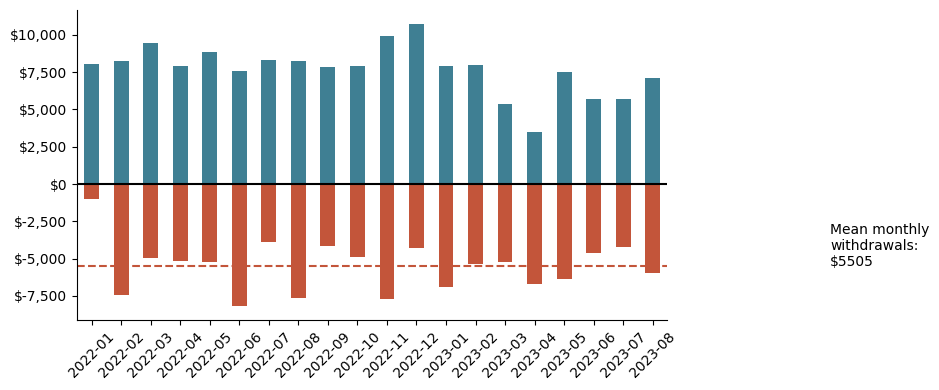

In [34]:
fig, ax = plt.subplots(figsize=(10, 4))

blue = sns.diverging_palette(220, 20)[0]
red = sns.diverging_palette(220, 20)[-1]

# Plot deposits positive
ax = monthly22_23['deposit'].plot(kind='bar', ax=ax, color=blue)

# Plot withdrawals negative
ax = (-1*monthly22_23['withdrawal']).plot(kind='bar', ax=ax, color=red)

# Add horizontal line at 0
ax.axhline(0, c='k')

# And for the average of my withdrawals, and my monthly salary for deposits
mean_withdrawals = monthly22_23.mean()['withdrawal']
ax.axhline(-1*mean_withdrawals, c=red, linestyle='--')
ax.text(25, -mean_withdrawals, f'Mean monthly\nwithdrawals:\n${mean_withdrawals:.0f}')

# # Salary after taxes and savings are removed
# salary = 2*2956.40
# ax.axhline(salary, c=blue, linestyle='--')
# ax.text(25, salary, f'Monthly salary:\n${salary:.0f}')

# Format axes
_ = ax.set_xticklabels(monthly22_23.index.strftime('%Y-%m'), rotation=45)
_ = ax.set_yticklabels(['${:,.0f}'.format(y) for y in ax.get_yticks()])
ax.set_xlabel('')

sns.despine()

fig.tight_layout()

What's my net money each month?

Text(0, 0.5, 'Withdrawals')

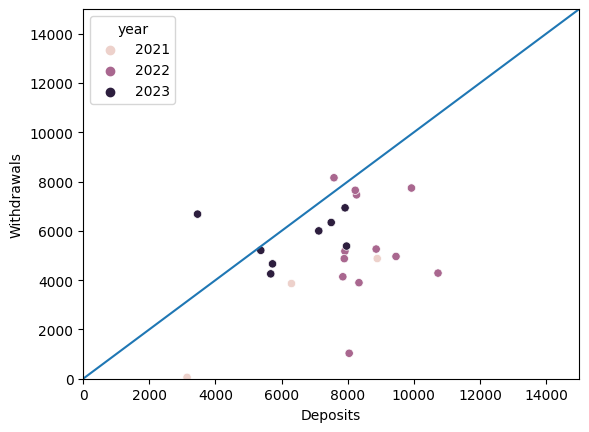

In [54]:
fig, ax = plt.subplots()
ax = sns.scatterplot(data=monthly, x='deposit', y='withdrawal', hue='year')
ax.set_xlim([0, 15000])
ax.set_ylim([0, 15000])
ax.plot([0, 15000], [0, 15000])
ax.set_xlabel('Deposits')
ax.set_ylabel('Withdrawals')

This excludes one month where I spent 100k (down payment) and another where I spent $40k (probably earnest money)

/var/folders/4w/7y3_zft107v_chf185m83c9r0000gn/T/ipykernel_45064/3538956036.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_yticklabels(['${:,.0f}'.format(y) for y in ax.get_yticks()])


Text(0.5, 0, '')

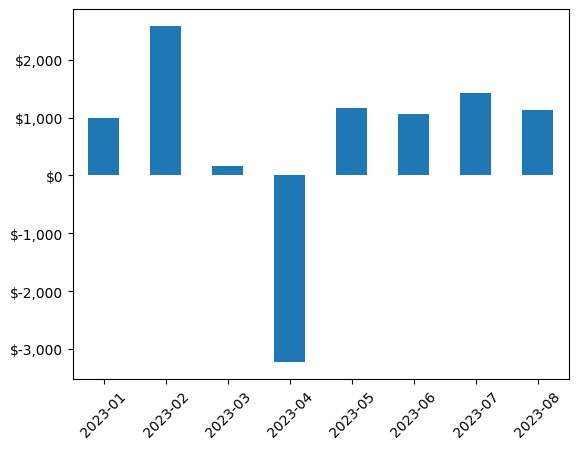

In [50]:
monthly['net_savings'] = monthly['deposit'] - monthly['withdrawal']

tmp = monthly[monthly['year'] >= 2023]
ax = tmp['net_savings'].plot(kind='bar')

# Format axes
_ = ax.set_xticklabels(tmp.index.strftime('%Y-%m'), rotation=45)
_ = ax.set_yticklabels(['${:,.0f}'.format(y) for y in ax.get_yticks()])
ax.set_xlabel('')


Cool, so since starting at SfA in May, I am pretty consistently saving $1000 per month. (The large dip in April is because I was fully unemployed that month :D )